<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px #b8daff;">
    <h1>Instacart Market Basket Analysis</h1>
    <h2>Project Overview</h2>
    <p>This project explores the shopping habits of customers using Instacart, a grocery delivery platform. The data, sourced from a Kaggle competition and modified for this analysis, will be used to gain insights into customer behaviors and trends.</p>
    <h2>Objectives</h2>
    <ul>
        <li>Clean the dataset by addressing missing values, duplicates, and data types.</li>
        <li>Analyze shopping patterns based on order times and days.</li>
        <li>Identify the most frequently purchased and reordered products.</li>
    </ul>
    <h2>Data Description</h2>
    <p>The dataset consists of five CSV files that cover orders, products, departments, aisles, and order-products details. It includes information such as order times, product names, and reordering data, which will be crucial in understanding customer purchase patterns.</p>
    <h2>Initial Observations</h2>
    <ul>
        <li>The <code>orders</code> dataset contains some duplicate entries which need to be removed to avoid biased results.</li>
        <li>The <code>products</code> dataset has missing product names, all associated with aisle ID 100 and department ID 21.</li>
        <li>Preliminary analysis indicates that certain products, like bananas and organic avocados, are top sellers.</li>
    </ul>
</div>



In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [51]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [52]:
# Check for all orders placed Wednesday at 2:00 AM
mask = (orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)
wednesday_2am_orders = orders[mask]

wednesday_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


Note: A mask in Python is a filter applied to an array or a data structure. It is a Boolean array that indicates which elements of the data structure should be selected or excluded based on some condition. I used mask to select the desired rows for finding orders on Wednesday at 2.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    

I agree here. Zero should indicate Monday, so we need to take the 2nd day. 
</div>

In [53]:
# Remove duplicate orders
orders = orders.drop_duplicates()

# Double check for duplicate rows
print(orders.duplicated().sum())

# Double check for duplicate order IDs only
print(orders.duplicated(subset='order_id').sum())

0
0


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        Removing duplicated orders in the Instacart dataset is crucial because such duplicates can introduce bias into the analysis and skew the results. For instance, if an order is recorded twice, it may falsely represent a single customer as placing multiple orders, which can lead to incorrect interpretations of order frequency and customer habits.
    </p>
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    

Conclusions are important, well done! </div>

In [54]:
#using info so i know what the column names and rows are
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [55]:
# Check for fully duplicate rows
products.duplicated().sum()

# Check for just duplicate product IDs
print(products.duplicated(subset='product_id').sum())

# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products.duplicated(subset='product_name').sum()

0


1361

In [56]:
# Check for duplicate product names that aren't missing
products.duplicated(subset='product_name').count()

49694

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        The previous code ensures that there are no duplicate product IDs. The code also ensures there are no duplicate product names, which is vital for maintaining data integrity and ensuring accurate analysis. Duplicate entries can lead to misrepresentation of product popularity and potentially skew downstream analyses such as market basket analysis.
    </p>
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    

Good idea. </div>

In [57]:
#using info to view column names
departments.info()
print('-' *40)

#Check for duplicates
print(departments.duplicated().sum())
print('-' *40)

#double checking for duplicates in each column since there are only two
print(departments.duplicated(subset='department_id').sum())
print('-' *40)

#double checking for duplicates in each column since there are only two
print(departments.duplicated(subset='department').sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
----------------------------------------
0
----------------------------------------
0
----------------------------------------
0


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        Zero duplicates found in the departments dataset. This is crucial for maintaining the integrity of departmental categorization and ensures that each unique department is represented only once, preventing any skew in analysis related to departmental data.
    </p>
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    

Very good! 
</div>

In [58]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [59]:
aisles.duplicated().sum()

0

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        Zero duplicates found in the aisles dataframe. This ensures the accuracy of the aisle categorization and is essential for reliable analysis, especially when studying shopping patterns or product placement within aisles.
    </p>
</div>


In [60]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [61]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum())

# Double check for any other tricky duplicates
print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0
0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment ✔️</h2>
    
There are no duplicates, which is good. 

</div>

In [62]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = products['product_name'].isna()
missing_product_names_df = products[missing_product_names]
result = (missing_product_names_df['aisle_id'] == 100).all()
print(result)

True


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        The previous code shows that all of the missing product names are associated with aisle ID 100.
    </p>
</div>

In [63]:
# Are all of the missing product names associated with department ID 21?
dep21_result = (missing_product_names_df['department_id'] == 21).all()
print(dep21_result)

True


In [64]:
# What is this aisle and department?
merged_aisles = pd.merge(missing_product_names_df, aisles, on='aisle_id')
merged_aisles = merged_aisles.drop_duplicates(subset='aisle_id')
aisle_name = merged_aisles.loc[merged_aisles['aisle_id'] == 100, 'aisle'].iloc[0]
merged_departments = pd.merge(missing_product_names_df, departments, on='department_id')
merged_departments = merged_departments.drop_duplicates(subset='department_id')
department_name = merged_departments.loc[merged_departments['department_id'] == 21, 'department'].iloc[0]
print(aisle_name)
print(department_name)

missing
missing


In [65]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products['product_name'].describe()

count       49694
unique      48333
top       Unknown
freq         1258
Name: product_name, dtype: object

In [66]:
products[products['product_name']=='Unknown']

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        The above results show that we have successfully replaced missing values with 'Unknown'
    </p>
</div>

In [67]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [68]:
# Are there any missing values where it's not a customer's first order?
not_first_order = orders[orders['order_number'] != 1]
missing_values = not_first_order['days_since_prior_order'].isna().any()
print(missing_values)

False


In [69]:
orders[orders['order_number'] != 1]['days_since_prior_order'].isna().sum()

0

In [70]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [71]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values = order_products['add_to_cart_order'].isna()
orders_with_missing_values = order_products[missing_values].order_id.unique()

# Do all orders with missing values have more than 64 products?
orders_grouped = order_products.groupby('order_id').size()
orders_with_missing_values = order_products[missing_values].order_id.unique()

result = (orders_grouped[orders_with_missing_values] > 64).all()
print(result)

1.0
64.0
True


In [72]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        All orders with missing values have more than 64 products.
    </p>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    
Very good.    
    
</div>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [73]:
order_hour_of_day_min = orders['order_hour_of_day'].min()
order_hour_of_day_max = orders['order_hour_of_day'].max()
order_dow_min = orders['order_dow'].min()
order_dow_max = orders['order_dow'].max()

print(order_hour_of_day_min >= 0 and order_hour_of_day_max <= 23)
print(order_dow_min >= 0 and order_dow_max <= 6)

True
True


### [A2] What time of day do people shop for groceries?

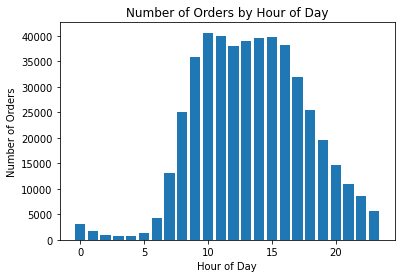

In [74]:
order_hour_counts = orders['order_hour_of_day'].value_counts()
order_hour_counts.sort_index(inplace=True)

plt.bar(order_hour_counts.index, order_hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    
    
Nice chart 👍    
</div>

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        The data and histogram tells us that number of orders spike around 1000 and begin to decline after 1500.
    
The chart shows that most people prefer to shop at 10am. 
    </p>
</div>

### [A3] What day of the week do people shop for groceries?

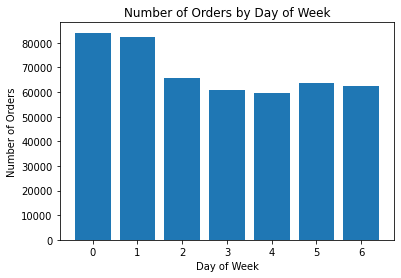

In [75]:
order_dow_counts = orders['order_dow'].value_counts()
order_dow_counts.sort_index(inplace=True)

plt.bar(order_dow_counts.index, order_dow_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.show()


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
People shop for groceries everyday. However, day 0 and day 1 have the most orders
    </p>
</div>

### [A4] How long do people wait until placing another order?

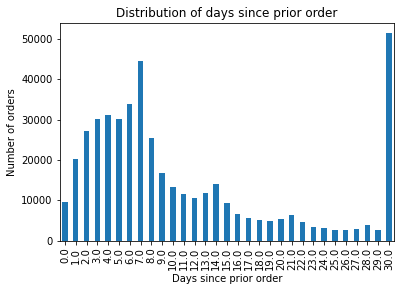

In [76]:
counts = orders['days_since_prior_order'].value_counts()
counts = counts.sort_index()

counts.plot(kind='bar')
plt.xlabel('Days since prior order')
plt.ylabel('Number of orders')
plt.title('Distribution of days since prior order')
plt.show()


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
Most people tend to wait 7 or 30 days before placing another order.
    </p>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment✔️</h2>
    
    
Exactly. 
</div>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

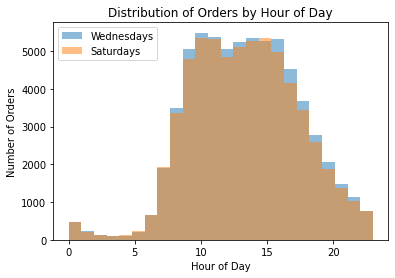

In [77]:
wednesdays = orders[orders['order_dow'] == 2]
saturdays = orders[orders['order_dow'] == 5]

plt.hist(wednesdays['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesdays')
plt.hist(saturdays['order_hour_of_day'], bins=24, alpha=0.5, label='Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of Day')
plt.legend()
plt.show()

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
There are slightly more orders on Wednesday than on Saturdays
    </p>
</div>

### [B2] What's the distribution for the number of orders per customer?

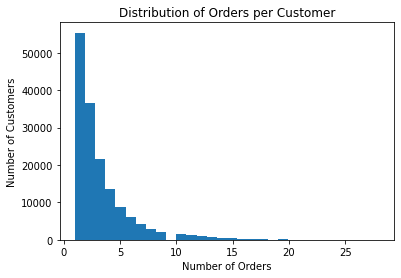

In [78]:
user_order_counts = orders.groupby('user_id').size()

plt.hist(user_order_counts, bins=30)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
The chart above shows that Instacart may be struggling with customer retention. A small percentage of customers place 10 or more orders and essentially none make more than 20 orders. 
    </p>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    
    
I agree. Seems like most people usually have no more than 10 orders. 
    
</div>

### [B3] What are the top 20 popular products (display their id and name)?

In [79]:
merged_df = pd.merge(order_products, products, on='product_id')
product_counts = merged_df['product_name'].value_counts()
top_20_products = product_counts.head(20)
print(top_20_products)


banana                      66050
bag of organic bananas      53297
organic strawberries        37039
organic baby spinach        33971
organic hass avocado        29773
organic avocado             24689
large lemon                 21495
strawberries                20018
limes                       19690
organic whole milk          19600
organic raspberries         19197
organic yellow onion        15898
organic garlic              15292
organic zucchini            14584
organic blueberries         13879
cucumber kirby              13675
organic fuji apple          12544
organic lemon               12232
apple honeycrisp organic    11993
organic grape tomatoes      11781
Name: product_name, dtype: int64


<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
The chart above shows that Instacart may be struggling with customer retention. A small percentage of customers place 10 or more orders and essentially none make more than 20 orders. 
    </p>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    
    
Absolutely correct!     
    
</div>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

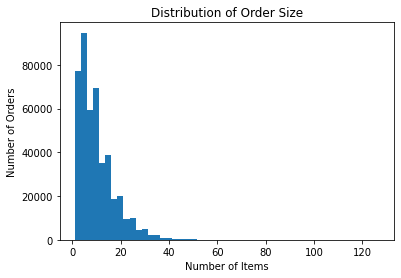

In [80]:
order_size = order_products.groupby('order_id')['product_id'].count()
order_size_counts = order_size.value_counts().sort_index()

plt.hist(order_size, bins=50)
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Size')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [81]:
merged_df = pd.merge(order_products, products, on='product_id')
reordered_products = merged_df[merged_df['reordered'] == 1]
reordered_counts = reordered_products.groupby(['product_id', 'product_name'])['reordered'].count()
top_20_reordered_products = reordered_counts.sort_values(ascending=False).head(20)
print(top_20_reordered_products)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
Name: reordered, dtype: int64


### [C3] For each product, what proportion of its orders are reorders?

In [82]:
product_reorder_proportions = order_products.groupby('product_id')['reordered'].mean()
print(product_reorder_proportions)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


### [C4] For each customer, what proportion of their products ordered are reorders?

In [83]:
df = order_products.merge(orders[['order_id', 'user_id']], on='order_id')
customer_reorder_proportions = df.groupby('user_id')['reordered'].mean()

print(customer_reorder_proportions)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


### [C5] What are the top 20 items that people put in their carts first? 

In [84]:
df_merge = order_products.merge(products)
add_cart = df_merge[df_merge['add_to_cart_order'] == 1]
add_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False).head(20)

product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
43352       raspberries      

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's Comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
The data shows different purchasing trends for Instacart. It can be inferred that most people use Instacart at the beginning of the week and most reorders are 7 days after previous order. The data also shows that most customers use Instacart for less than 20 items. One possible improvement Instacart may consider is retaining customers. Section B2 suggests Instacart is dependent on signing up new customers since very few make 10 or more orders.  
    </p>
</div>

<div style="background-color: #e6f7ff; border-left: 4px solid #9fd3f7; padding: 15px; border-radius: 5px; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Conclusion</h2>
    <h3 style="color: #31708f;">Key Insights</h3>
    <ul style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        <li>The most common shopping hours are between 10 AM and 3 PM, indicating peak times for placing orders.</li>
        <li>The shopping activity varies throughout the week, with the beginning and the weekend being the busiest.</li>
        <li>Products like bananas and organic avocados are among the top reordered items, suggesting a trend towards healthier food choices among Instacart users.</li>
    </ul>
    <h3 style="color: #31708f;">Implications for Instacart</h3>
    <ul style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        <li>Instacart could consider optimizing their delivery schedules around peak order times to improve efficiency.</li>
        <li>Marketing strategies could be tailored to push certain products that are more likely to be reordered, enhancing customer retention.</li>
        <li>Understanding which days have higher order volumes can help Instacart manage inventory and staffing more effectively.</li>
    </ul>
    <h3 style="color: #31708f;">Final Thoughts</h3>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        This analysis provides valuable insights into customer behavior on the Instacart platform. By addressing data quality issues and conducting a thorough exploratory data analysis, we've uncovered patterns that could help Instacart enhance their service and capitalize on trends to drive growth.
    </p>
</div>



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    

Great!    
    
</div>